# Data Analysis

Notebook to convert all electric currents from time domain to frequency domain, by Fourier Transform, and analyse and visualize those currents.

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../TimeDomain/ElectricCurrentDataset.txt')
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Device
0,0.0,1.66,1.84,2.09,1.66,1.24,0.71,0.00,0.60,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
1,0.0,1.31,1.13,1.59,1.74,1.56,1.35,1.03,0.64,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
2,0.0,0.96,1.74,1.70,2.02,1.66,1.06,0.53,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
3,0.0,1.24,2.27,2.02,1.95,1.56,1.13,0.67,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
4,0.0,1.70,1.77,1.98,1.81,1.13,0.78,0.71,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook


## Combinações de Correntes

In [47]:
classes=[]
for i in dataset['Device']:
    if i not in classes:
        classes.append(i)

In [48]:
#Transformando o Dataframe dataset em matriz
matrix_dataset = list(dataset.as_matrix())

/Users/jeanlima/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [49]:
#transformando cada linha da matriz em um numpy array
for i in range(len(matrix_dataset)):
    matrix_dataset[i] = np.asarray(matrix_dataset[i])

### Dois a dois

In [50]:
for i in range(len(dataset)):
    for j in range(1, len(classes)):
        if i+(200*j)<len(dataset):
            matrix_dataset.append(matrix_dataset[i]+matrix_dataset[i+(200*j)])

### Três a três

In [51]:
for i in range(len(dataset)):
    for j in range(1, len(classes)):
        for k in range(1, len(classes)):
            if i+(200*j) < len(dataset) and i+(200*(j+k)) < len(dataset):
                matrix_dataset.append(matrix_dataset[i] + matrix_dataset[i+(200*j)] + matrix_dataset[i+(200*(j+k))])

### Quatro a quatro

In [52]:
for i in range(200):
    matrix_dataset.append(matrix_dataset[i] + matrix_dataset[i+(200*1)] + matrix_dataset[i+(200*(2))] + matrix_dataset[i+(200*(3))])

In [53]:
#Novo dataset
new_dataset = pd.DataFrame(matrix_dataset)

In [54]:
new_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,0.0,1.66,1.84,2.09,1.66,1.24,0.71,0.00,0.60,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
1,0.0,1.31,1.13,1.59,1.74,1.56,1.35,1.03,0.64,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
2,0.0,0.96,1.74,1.70,2.02,1.66,1.06,0.53,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
3,0.0,1.24,2.27,2.02,1.95,1.56,1.13,0.67,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
4,0.0,1.70,1.77,1.98,1.81,1.13,0.78,0.71,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook


/Users/jeanlima/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/jeanlima/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


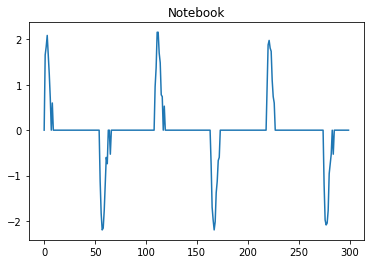

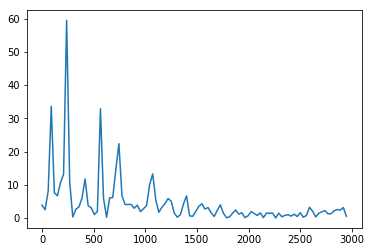

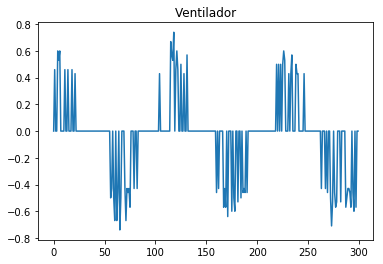

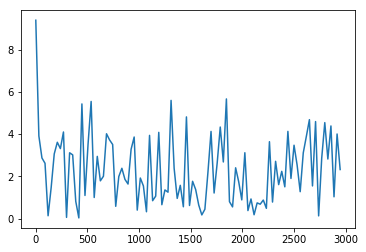

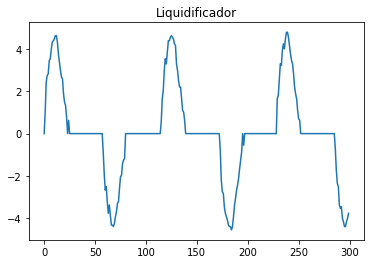

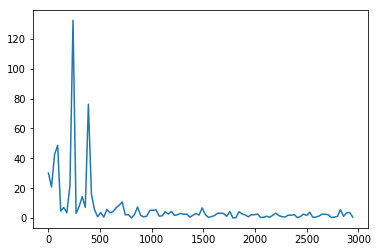

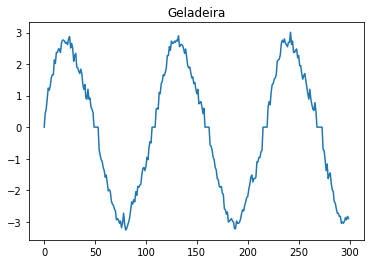

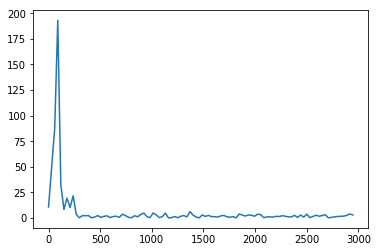

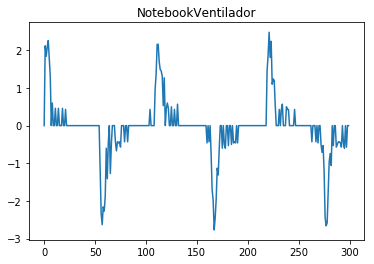

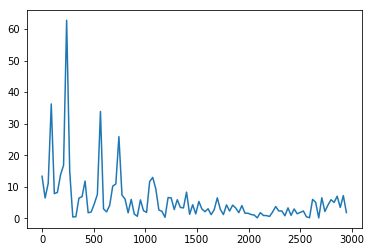

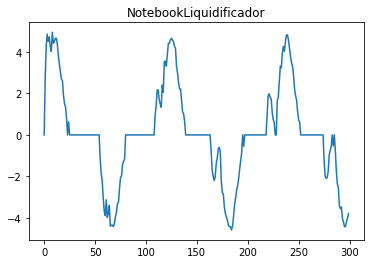

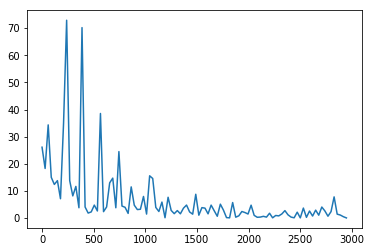

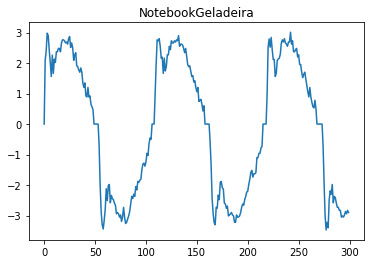

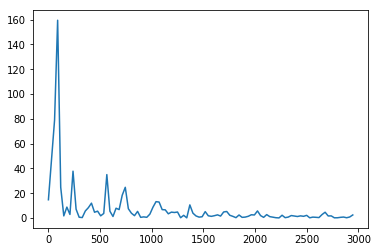

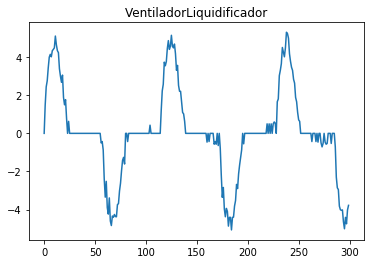

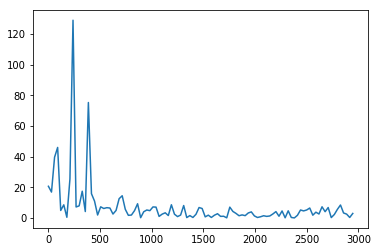

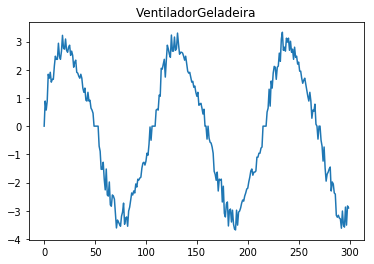

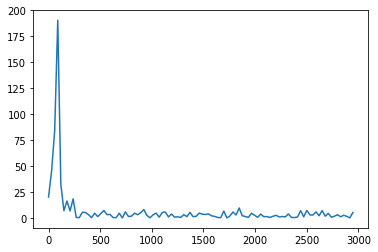

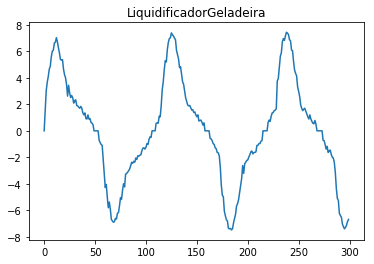

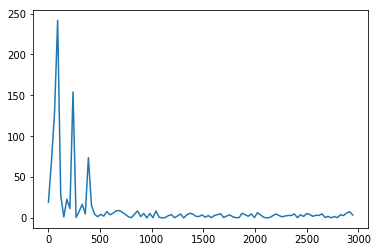

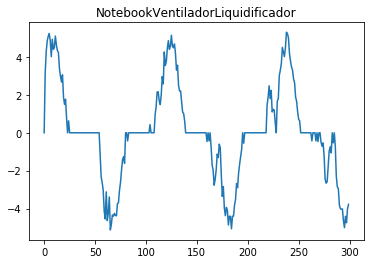

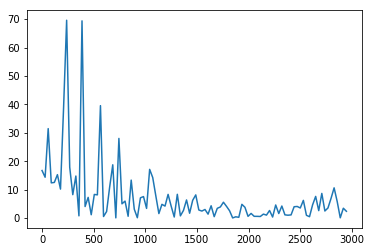

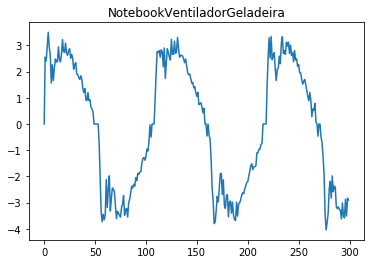

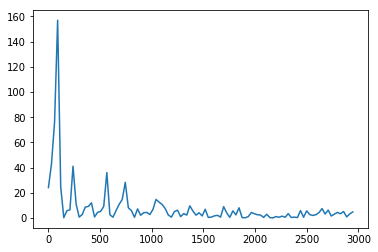

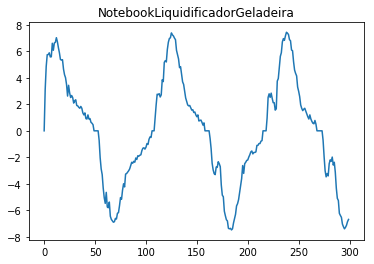

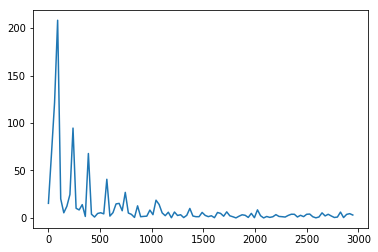

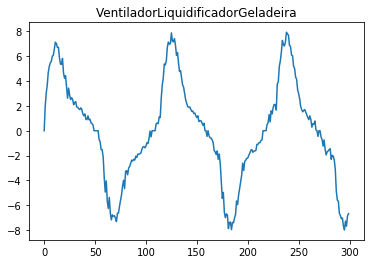

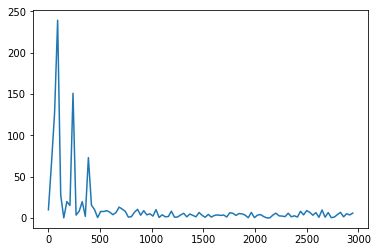

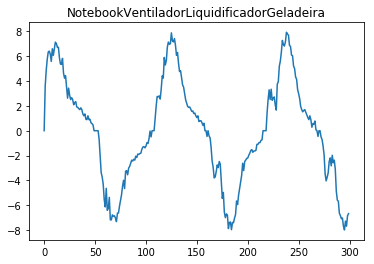

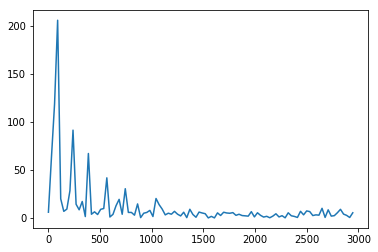

In [55]:
device_position = 300
classes=[]
for i in new_dataset[device_position]:
    if i not in classes:
        classes.append(i)

Fs = 8930.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
n = 300 # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(n//2)] # one side frequency range
        
aux = []
for classe in classes:
    signal = new_dataset[new_dataset[device_position]==classe]
    signal.drop([device_position], axis=1, inplace=True)
    signal = signal.as_matrix()
    if classe not in aux:
        plt.plot(signal[0])
        plt.title(classe)
        aux.append(classe)
        plt.show()
        fft = np.fft.fft(signal[0]).real[0:100]
        plt.plot(frq[0:100],abs(fft))
        plt.show()
        

## Salvando Dataset - Domínio da Frequência

In [56]:
frequency_dataset = []
for i in range(len(matrix_dataset)):
    signal = []
    signal = list(matrix_dataset[i][:device_position])
    spectro = np.fft.fft(signal).real[:100]
    frequency_dataset.append(list(abs(spectro)))
    frequency_dataset[i].append(matrix_dataset[i][device_position])
    

#Novo dataset
frequency_dataset = pd.DataFrame(frequency_dataset)
frequency_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,3.93,2.513044,8.163932,33.629912,7.659697,6.725006,10.643506,13.177546,59.482317,10.749250,...,1.888285,2.273819,1.312697,1.323685,2.193599,2.599519,2.390184,3.165756,0.534784,Notebook
1,1.00,0.191735,4.678745,23.926314,8.975643,6.839434,8.616491,10.477577,54.968947,3.580283,...,0.184238,1.160567,0.852239,1.300667,0.425774,1.524319,0.897228,1.132210,0.852345,Notebook
2,3.07,3.250578,3.296642,28.901722,7.726107,9.185737,9.997531,13.401718,53.479286,8.655162,...,0.802962,0.547124,0.942776,0.718461,0.779437,0.926345,1.893492,0.777703,0.770305,Notebook
3,1.94,0.968233,4.019366,27.971932,10.626979,7.588198,9.675171,14.644327,55.259634,3.368294,...,1.568216,1.422735,0.251880,0.763626,1.406309,1.429444,0.035365,1.100480,0.615161,Notebook
4,4.44,1.646007,4.716094,32.419320,8.428120,8.383729,11.016293,12.865954,56.504946,12.448456,...,2.359542,0.006621,0.500235,0.081978,0.039892,2.824678,1.531935,0.927873,1.221977,Notebook


In [57]:
frequency_dataset.to_csv('Dataset.csv', index=False)